# THE INDIAN START-UP ECOSYSTEM

## Business Understanding

The objective of this project is to provide key insights into India's rapidly growing start-up ecosystem to attract new groups of investors. By analyzing historical data on funding trends, sector performance, investment stages, and geographic distributions, the project aims to highlight opportunities that would be appealing to potential investors. This will assist investors in identifying lucrative sectors, understanding how funding varies across different investment stages, and determining which geographical regions in India present the most promise for future investment.


## Problem Statement
India’s start-up ecosystem has witnessed significant growth in recent years, yet many investors remain uncertain about where to allocate their resources. With a large number of start-ups and varying levels of funding across different sectors, investment stages, and regions, it can be challenging for potential investors to make informed decisions. The lack of detailed insights into funding patterns, sectoral trends, and geographical investment opportunities hinders new investments in the ecosystem. This analysis seeks to bridge that gap and provide clarity to investors.


## Project Goal
The goal of this project is to perform a comprehensive analysis of the Indian start-up ecosystem using the CRISP-DM methodology. By focusing on funding trends, sectoral performance, investment stage analysis, and geographical distribution, the project aims to uncover key insights that will attract new investors. The final deliverables will provide detailed answers to critical business questions and present a data-driven report that highlights promising investment opportunities and influential investors within the ecosystem.



##### Stakeholders

- Investors



## Features

- Company_Brand: Name of the start-up

- Founded: The year the start-up was founded.

- HeadQuarters: City where the start-up is located

- Sector: Domain industry of the start-up

- Overview: A brief description of the start-up business

- Founders: Names of the founders

- Investors: Investors or investments firms that funded the start-up

- Amount: The amount of funding received (in $USD)

- Stage: Stage of investment (e.g Pre-seed, Seed, Series A e.t.c)









## Hypothesis


We use hypothesis testing to do a statistical test on the sample to generate conclusions and inferences about the whole data. We develop a null and alternative hypothesis to focus on.

- Null Hypothesis (Ho): There is no significant difference in the amount of the funding received by start-ups across different sectors and stages.

- Alternate Hypothesis(H1): There is a significant difference in the amount of the funding received by start-ups across different sectors and stages.





## Business Questions

 1. Funding Trends:

 How has the total funding amount changed year over year from 2018 to 2021?
 Which top 5 start-ups receives the most funding and reason why they get the most funds.?

2. Sector Analysis:

 Which sectors have received the most funding, and how does the funding distribution vary across sectors?

3. Stage Analysis: 

  What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?

  What is the trend of change in the average funding from the year 2018 to 2021?


4. Geographical Analysis: 

  Which City and region in the india ecosystem are investors likely to channel their funds and the factors that affect their decisions?


5. Investor Influence: 

  Who are the top 10 investors in the indian ecosystem. What is their funding pattern and areas they will like to invest in?

# Data Understanding & Preparation


Before I clean and analyze the data I install all relevant libraries we will need and connect to all the data sources.

In [1]:
%pip install pyodbc  
%pip install python-dotenv
%pip install squarify


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [118]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify
import re
from datetime import datetime

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import skew, kurtosis




import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load environment variables from .env file into a dictionary

environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

# Loading the all data sets for the Start-Up funding (from 2018-2021)

In [5]:
#Loading table 1 which is the 2020 datasets
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.


query = "SELECT * FROM dbo.LP1_startup_funding2020"

data_2020 = pd.read_sql(query, connection)

In [6]:
#Loading table 2 which is the 2021 data sets 

query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2021= pd.read_sql(query, connection)

In [7]:
#Load the data from the source (2019)


data_2019= pd.read_csv('../Data/startup_funding2019.csv')

In [8]:
#Load the data from the source (2018)


data_2018= pd.read_csv('../Data/startup_funding2018.csv')
                       



# Exploring All Datasets (EDA) & Data Cleaning

A deep dive and observation to have an overview on the kind of dataset we are dealing with. (variables, data types, inconsistencies e.t.c)

Dataset 2021

In [9]:
# View the entire info of the dataset (2021)

data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [10]:
# View the upper part of the dataset (2021)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [11]:
# View the latter part of the dataset (2021)

data_2021.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [12]:
#Show the shape of the dataset (2021)

data_2021.shape

(1209, 9)

In [13]:
#Show the Summary Statistics for 2021

data_2021.describe().T


,count,mean,std,min,25%,50%,75%,max
Founded,1208.0,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0


Dataset 2020

In [14]:
# View the entire info of the dataset (2020)

data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [15]:
# View the upper part of the dataset (2020)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [16]:
# View the latter part of the dataset (2020)

data_2020.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [17]:
#Show the shape of the dataset (2020)

data_2020.shape

(1055, 10)

In [18]:
#Show the Summary Statistics for 2020

data_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,842.0,2.015363e+03,4.097909e+00,1973.0,2014.0,2016.0,2018.0,2.020000e+03
Amount,801.0,1.130430e+08,2.476635e+09,12700.0,1000000.0,3000000.0,11000000.0,7.000000e+10


Dataset 2019

In [19]:
# View the entire info of the dataset (2019)

data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [20]:
# View the upper part of the dataset (2019)

data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [21]:
# View the lower part of the dataset (2019)

data_2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [22]:
#Show the shape of the dataset (2019)

data_2019.shape

(89, 9)

In [23]:
#Show the Summary Statistics for 2019

data_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


Dataset 2018

In [24]:
# View the entire info of the dataset (2018)

data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [25]:
# View the upper part of the dataset (2018)

data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [26]:
# View the lower part of the dataset (2018)

data_2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [27]:
#Show the shape of the dataset (2018)

data_2018.shape

(526, 6)

In [28]:
#Show the Summary Statistics for 2018

data_2018.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [29]:
#Rename columns of data_2018 to match combined_data
data_2018 = data_2018.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company':'What_it_does'
})

# Preprocessing the data to check the quality of all the dataset 2021-2018

#Display the data types on Start-up funding 2018-2021

In [30]:
# Dataset 2021

data_2021.dtypes 

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [31]:
# Dataset 2020


data_2020.dtypes 

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
column10          object
dtype: object

In [32]:
# Dataset 2019

data_2019.dtypes 

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [33]:
# Dataset 2018

data_2018.dtypes 

Company_Brand    object
Sector           object
Stage            object
Amount           object
HeadQuarter      object
What_it_does     object
dtype: object

#Display the unique data types on Start-up funding 2021-2018


In [34]:
#Display 2021

data_2021.nunique()

Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
dtype: int64

In [35]:
#Display 2020

data_2020.nunique()

Company_Brand    905
Founded           26
HeadQuarter       77
Sector           302
What_it_does     990
Founders         927
Investor         848
Amount           300
Stage             42
column10           2
dtype: int64

In [36]:
#Display 2019

data_2019.nunique()

Company/Brand    87
Founded          12
HeadQuarter      17
Sector           52
What it does     88
Founders         85
Investor         86
Amount($)        50
Stage            15
dtype: int64

In [37]:
#Display 2018

data_2018.nunique()

Company_Brand    525
Sector           405
Stage             21
Amount           198
HeadQuarter       50
What_it_does     524
dtype: int64

In [38]:
# Standardize column names in each DataFrame

data_2018.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)
 
data_2019.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)
 
data_2021.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)
 
data_2021.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)

In [39]:
# Add the 'Year' column

data_2021['Year'] = 2021
data_2020['Year'] = 2020
data_2019['Year'] = 2019
data_2018['Year'] = 2018

# CONCATENATING DATASETS

In [40]:
# Combine all datasets

df_combined = pd.concat([data_2021, data_2020, data_2019, data_2018], ignore_index=True)

In [41]:
# Convert the 'Year' column to datetime format (handling NaNs appropriately)

df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')

In [42]:
#Extract the Year

df_combined['Year'] = df_combined['Year'].dt.year


In [43]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   Year           2879 non-null   int32  
 10  column10       2 non-null      object 
dtypes: float64(1), int32(1), object(9)
memory usage: 236.3+ KB


In [44]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2110.0,2016.079621,4.368006,1963.0,2015.0,2017.0,2019.0,2021.0
Year,2879.0,2020.023619,1.086974,2018.0,2020.0,2020.0,2021.0,2021.0


In [45]:
df_combined.dtypes


Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
Year               int32
column10          object
dtype: object

In [46]:
df_combined.nunique()

Company_Brand    2214
Founded            34
HeadQuarter       172
Sector            873
What_it_does     2691
Founders         1980
Investor         1777
Amount            774
Stage              75
Year                4
column10            2
dtype: int64

In [47]:
df_combined.shape

(2879, 11)

In [48]:
df_combined.duplicated().sum()

23

# CLEANING ALL THE DATASETS 2021-2018

In [49]:
# Renaming columns to standardize names

df_combined.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
},inplace=True)

In [50]:
# Check for duplicated columns

df_combined.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [51]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   Year           2879 non-null   int32  
 10  column10       2 non-null      object 
dtypes: float64(1), int32(1), object(9)
memory usage: 236.3+ KB


In [52]:
# Drop column10 since it has NaN values

df_combined.drop('column10', axis=1, inplace=True)



# COLUMN BY COLUMN CLEANING

In [53]:
df_combined['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [54]:
# Define the cleaning function

def clean_amount(amount):
    if pd.isna(amount) or amount in ['Undisclosed', '$Undisclosed', 'Upsparks']:
        return np.nan
    if isinstance(amount, str):
        amount = amount.replace(',', '').replace('$', '').replace('₹', '')
    try:
        amount = float(amount)
    except ValueError:
        return np.nan
    return amount


In [55]:
# Apply the cleaning function to the 'Amount' column

df_combined['Amount'] = df_combined['Amount'].apply(clean_amount)

In [56]:
# Create a temporary column to identify the currency type

df_combined['Currency'] = df_combined['Amount'].apply(lambda x: 'INR' if '₹' in str(x) else 'USD')

In [57]:
# Function to convert all amounts to USD

def convert_currency(amount, currency):
    if currency == 'INR':
        return amount * 0.013  # Assuming an exchange rate of 1 INR = 0.013 USD
    return amount

In [58]:
# Convert all amounts to USD

df_combined['Amount'] = df_combined.apply(lambda row: convert_currency(row['Amount'], row['Currency']), axis=1)



In [59]:
# Drop the temporary 'Currency' column

df_combined.drop(columns=['Currency'], inplace=True)


In [60]:
# Convert the cleaned 'Amount' column to numeric, forcing errors to NaN

df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')


In [61]:
# Check for missing values before filling

missing_values_before = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column before filling: {missing_values_before}")


Missing values in 'Amount' column before filling: 567


In [62]:
# Fill remaining missing values in 'Amount' column with the median value

df_combined['Amount'].fillna(df_combined['Amount'].median(), inplace=True)

In [63]:
# Check for missing values after filling

missing_values_after = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column after filling: {missing_values_after}")

Missing values in 'Amount' column after filling: 0


In [64]:
# Check the cleaned DataFrame

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2879 non-null   float64
 8   Stage          1941 non-null   object 
 9   Year           2879 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 213.8+ KB


FOUNDED

In [65]:
df_combined['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963., 1982., 1995., 1973., 2001.])

In [66]:
# Drop rows where the 'founded' column has values less than 1980 or greater than 2021
df_combined = df_combined[(df_combined['Founded'] >= 1980) & (df_combined['Founded'] <= 2021)].reset_index(drop=True)

# Display info of Data Frame
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2106 non-null   object 
 1   Founded        2106 non-null   float64
 2   HeadQuarter    2033 non-null   object 
 3   Sector         2097 non-null   object 
 4   What_it_does   2106 non-null   object 
 5   Founders       2097 non-null   object 
 6   Investor       2009 non-null   object 
 7   Amount         2106 non-null   float64
 8   Stage          1289 non-null   object 
 9   Year           2106 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 156.4+ KB


HEADQUARTERS

In [67]:
def replace_odd_location(location):
    # Check if the location is None or not a string
    if location is None or not isinstance(location, str):
        return 'Not filled'
   
    # Check if the location contains '#REF!'
    if '#REF!' in location:
        return 'Not filled'
   
    # Check if the location contains 'India' or 'Asia'
    if 'India' in location:
        # Compile the regular expression for better performance if used multiple times
        regex = re.compile(r'([^,]+),')
        match = regex.match(location)
        if match:
            city = match.group(1).strip()
            # Ensure the extracted city is not "India" or ambiguous terms
            if city and city.lower() not in {'india', 'asia'}:
                return city
            else:
                return 'Not filled'  
 
    # Specific replacements
    if location == 'India, Asia':
        return 'Not filled'    
    if location == 'Small Towns, Andhra Pradesh':
        return 'Andhra Pradesh'
    if location == 'Uttar pradesh':
        return 'Uttar Pradesh'    
    if location == 'Faridabad, Haryana':
        return 'Faridabad'
    if location == 'Ahmadabad':
        return 'Ahmedabad'
    if location == 'Mountain View, CA':
        return 'Mountain View'
    if location == 'Tirunelveli, Tamilnadu':
        return 'Tirunelveli'
    if location == 'Jaipur, Rajastan':
        return 'Jaipur'
    if location == 'Dhingsara, Haryana':
        return 'Dhingsara'
    if location == 'Thiruvananthapuram':
        return 'Trivandrum'    
    if location == 'Samastipur, Bihar':
        return 'Samastipur'
    if location == 'Tumkur, Karnataka':
        return 'Tumkur'
    if location == 'Rajastan':
        return 'Rajasthan'
    if location == 'Warangal':
        return 'Warangal'
    if location == 'Hyderebad':
        return 'Hyderabad'
    if location == 'Banglore' or location == 'Bengaluru' or location == 'Bangalore City':
        return 'Bangalore'  
    if location == 'Frisco, Texas, United States':
        return 'Frisco'
    if location == 'New York, United States':
        return 'New York'
    if location == 'San Francisco, California, United States' or location == 'San Francisco, United States' or location == 'San Francisco Bay Area, Silicon Valley, West Coast' or location == 'San Francisco Bay Area, West Coast, Western US' or location == 'San Franciscao':
        return 'San Francisco'
    if location == 'San Ramon, California':
        return 'San Ramon'
    if location == 'Paris, Ile-de-France, France':
        return 'Paris'
    if location == 'Plano, Texas, United States':
        return 'Plano'
    if location == 'Sydney, New South Wales, Australia':
        return 'Sydney'
    if location == 'Milano, Lombardia, Italy':
        return 'Milan'
    if location == 'Palmwoods, Queensland, Australia':
        return 'Palmwoods'
    if location == 'Irvine, California, United States':
        return 'Irvine'
    if location == 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom':
        return 'Newcastle upon Tyne'
    if location == 'Shanghai, China':
        return 'Shanghai'
    if location == 'Jiaxing, Zhejiang, China':
        return 'Jiaxing'
    if location == 'Tangerang, Jawa Barat, Indonesia':
        return 'Tangerang'
   
    # A simple regex to identify locations with non-geographic content (basic approach)
    if re.search(r'\d', location) or re.search(r'[^a-zA-Z, ]', location) or len(location.split()) > 2:
        return 'Not filled'
   
    # A list of non-geographic keywords
    non_geographic_keywords = ['Computer Games', 'Food & Beverages', 'Pharmaceuticals', 'Online Media', 'Information Technology & Services', 'Santra']
   
    # Check if location is in the list of non-geographic keywords
    if location in non_geographic_keywords:
        return 'Not filled'
   
    return location
 
# Replace non-geographic odd entries in the 'HeadQuarter' column
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].apply(replace_odd_location)
 
# Replace 'Bengaluru' and 'Bangalore City' with 'Bangalore' in the 'HeadQuarter' column
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].replace({'Bengaluru': 'Bangalore', 'Bangalore City': 'Bangalore'})
 
# List of entries to drop
entries_to_drop = ['Beijing', 'New York', 'Mountain View', 'London','California', 'France', 'Bangaldesh']
 
# Drop rows where 'HeadQuarter' contains any of the entries in the 
df_combined = df_combined[~df_combined['HeadQuarter'].isin(entries_to_drop)].reset_index(drop=True)
 
# Display info of Data Frame
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2092 non-null   object 
 1   Founded        2092 non-null   float64
 2   HeadQuarter    2092 non-null   object 
 3   Sector         2083 non-null   object 
 4   What_it_does   2092 non-null   object 
 5   Founders       2083 non-null   object 
 6   Investor       1997 non-null   object 
 7   Amount         2092 non-null   float64
 8   Stage          1281 non-null   object 
 9   Year           2092 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 155.4+ KB


In [68]:
# list of Indian cities
indian_cities = [
    'Ahmedabad', 'Ambernath', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Andheri',
    'Arunachal Pradesh', 'Assam', 'Bangalore', 'Belgaum', 'Bengaluru', 'Bihar', 'Bhilwara',
    'Bhopal', 'Bhubaneswar', 'Chandigarh', 'Chennai', 'Chhattisgarh', 'Coimbatore', 'Cochin', 'Dehradun',
    'Delhi', 'Dhingsara', 'Faridabad', 'Ghaziabad', 'Gandhinagar', 'Goa', 'Gujarat', 'Gurgaon', 'Gurugram', 'Guwahati',
    'Haryana', 'Himachal Pradesh', 'Hyderabad', 'Indore', 'Jaipur', 'Jammu and Kashmir',
    'Jharkhand', 'Jodhpur', 'Kanpur', 'Karnataka', 'Kerala', 'Kochi', 'Kolkata', 'Kottayam',
    'Lucknow', 'Ludhiana', 'Madhya Pradesh', 'Maharashtra', 'Mangalore', 'Mohali', 'Mumbai',
    'Nagaland', 'Nagpur', 'New Delhi', 'Noida', 'Odisha', 'Orissia', 'Panchkula', 'Panaji', 'Patna',
    'Puducherry', 'Powai', 'Pune', 'Rajsamand', 'Rajasthan', 'Ranchi', 'Roorkee', 'Samastipur',
    'Satara', 'Samsitpur', 'Silvassa', 'Sikkim', 'Surat', 'Tamil Nadu', 'Telangana', 'Telugana',
    'Thane', 'Thiruvananthapuram', 'The Nilgiris', 'Tirunelveli', 'Trivandrum', 'Tumkur',
    'Uttar Pradesh', 'Uttarakhand', 'Vadodara', 'Warangal', 'West Bengal',
    'Kalkaji', 'Hubli', 'Azadpur', 'Kota', 'Anand', 'Bangalore City', 'Margão', 'Alwar', 'Kannur',
    'Ernakulam', 'Kormangala', 'Mylapore', 'Guntur', 'Kalpakkam', 'Worli', 'Alleppey', 'Guindy'
]


# Ensure city names are compared correctly by stripping and converting to lower case
indian_cities_normalized = [city.lower().strip() for city in indian_cities]
 
# Filter the rows where the headquarters is not in the list of Indian cities
outside_df_combined = df_combined[~df_combined['HeadQuarter'].str.lower().str.strip().isin(indian_cities_normalized)]
 


In [69]:
# List unique cities outside India
cities_outside = outside_df_combined['HeadQuarter'].unique()
cities_outside

array(['Not filled', 'Singapore', 'Frisco', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'Milan', 'Palmwoods', 'Irvine',
       'Newcastle upon Tyne', 'Shanghai', 'Jiaxing', 'Tangerang',
       'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok'], dtype=object)

In [70]:
# Find duplicate rows based on specified columns
duplicate_rows= df_combined[df_combined.duplicated(subset=['Company_Brand', 'Founded', 'Sector', 'What_it_does', 'Founders'], keep=False)]
 
# Filter out entries with a single unique value and 'Not filled' in the 'HeadQuarter' column within each group
filtered_duplicate_rows = duplicate_rows.groupby(['Company_Brand']).filter(lambda x: ((x['HeadQuarter'].nunique() == 2) and (x['HeadQuarter'].eq('Not filled').any())))
 
# Display the filtered duplicate rows
filtered_duplicate_rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
1768,Byju's,2011.0,Bangalore,Edtech,Provides online learning classes,Byju Raveendran,BOND,4000000.0,None,2020
2021,Rivigo,2014.0,Gurugram,Logistics,It offers delivery services across India to re...,"Deepak Garg, Gazal Kalra",Trifecta Capital,3400000.0,Series F,2020
2041,Byju's,2011.0,Not filled,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN,2019
2056,Rivigo,2014.0,Not filled,Logistics,It offers delivery services across India to re...,"Deepak Garg, Gazal Kalra","SAIF Partners India VI Ltd, Spring Canter Inve...",20000000.0,Series F,2019


In [71]:
key_columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders']

# Extract unique company brands from the filtered duplicate rows
unique_brands = filtered_duplicate_rows['Company_Brand'].unique()
 
# Store the unique company brands in a list named 'target'
target= list(unique_brands)
 
# Filter the DataFrame to include only rows with Company_Brand in the target list and specified indices
target_brands = df_combined[df_combined['Company_Brand'].isin(target) & df_combined.index.isin([1813, 2234, 2266, 2284])]
 
# Iterate through each Company_Brand in the target dataset
for brand in target:
    # Get the non-null 'Headquarters' value for this brand that is not 'Not filled'
    location_value = target_brands.loc[
        (target_brands['Company_Brand'] == brand) & 
        (target_brands['HeadQuarter'] != 'Not filled') &
        (target_brands['HeadQuarter'].notna()), 
        'HeadQuarter'
    ].dropna().values
    
    # Ensure there's at least one valid headquarter value before proceeding
    if len(location_value) > 0:
        # Extract the first valid headquarters value
        location_value = location_value[0]
        
        # Fill missing 'Headquarters' values and 'Not filled' values with the identified non-null value
        df_combined.loc[
            (df_combined['Company_Brand'] == brand) & 
            ((df_combined['HeadQuarter'].isna()) | (df_combined['HeadQuarter'] == 'Not filled')), 
            'HeadQuarter'
        ] = location_value

# Display info of Data Frame
df_combined.info()
 
# Display the Dataframe to confirm imputation
target_brands_filled = df_combined[df_combined['Company_Brand'].isin(target)]
target_brands_filled[target_brands_filled.duplicated(subset=key_columns, keep=False)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2092 non-null   object 
 1   Founded        2092 non-null   float64
 2   HeadQuarter    2092 non-null   object 
 3   Sector         2083 non-null   object 
 4   What_it_does   2092 non-null   object 
 5   Founders       2083 non-null   object 
 6   Investor       1997 non-null   object 
 7   Amount         2092 non-null   float64
 8   Stage          1281 non-null   object 
 9   Year           2092 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 155.4+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year


In [72]:
# Drop the rows where the headquarters is outside India
df_combined.drop(outside_df_combined.index, inplace=True)


In [73]:
# Filter the rows where the headquarters is not in the list of Indian cities
outside_df_combined = df_combined[~df_combined['HeadQuarter'].str.lower().str.strip().isin(indian_cities_normalized)]

# List unique cities outside India
cities_outside = outside_df_combined['HeadQuarter'].unique()
cities_outside
 

array([], dtype=object)

In [74]:
df_combined['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmedabad', 'Chennai', 'Andhra Pradesh', 'Goa',
       'Rajsamand', 'Ranchi', 'Faridabad', 'Gujarat', 'Pune', 'Thane',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Kolkata',
       'Mohali', 'Haryana', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Telangana',
       'Silvassa', 'Trivandrum', 'Roorkee', 'Ambernath', 'Panchkula',
       'Surat', 'Coimbatore', 'Andheri', 'Mangalore', 'Telugana',
       'Bhubaneswar', 'Kottayam', 'Panaji', 'Satara', 'Orissia',
       'Jodhpur', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati', 'Kochi',
       'The Nilgiris', 'Gandhinagar', 'Belgaum', 'Tirunelveli', 'Kerala',
       'Dhingsara', 'Samastipur', 'Tumkur', 'Rajasthan', 'Ludhiana',
       'Dehradun', 'Delhi', 'Warangal', 'Odisha', 'Bihar', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal'], dtype=object)

In [75]:
# Ensure proper conversion and filling

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1975 entries, 0 to 2091
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1975 non-null   object 
 1   Founded        1975 non-null   float64
 2   HeadQuarter    1975 non-null   object 
 3   Sector         1967 non-null   object 
 4   What_it_does   1975 non-null   object 
 5   Founders       1966 non-null   object 
 6   Investor       1883 non-null   object 
 7   Amount         1975 non-null   float64
 8   Stage          1216 non-null   object 
 9   Year           1975 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 162.0+ KB


SECTOR

In [76]:
df_combined['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [77]:
# Dictionary for common misspellings and inconsistencies
replacement_dict = {
    "Helathcare": "healthcare",
    "Healtcare": "healthcare",
    "Heathcare": "healthcare",
    "HeathTech": "healthtech",
    "Med Tech": "medtech",
    "Information Technology & Services": "it",
    "Manufacturing": "electronics manufacturing",
    "Company-as-a-Service": "caas",
    "Telecommuncation": "telecommunication",
    "HeathTech": "healthTech",
    "Deep Tech": "deeptech",
    "Deep Tech AI": "deeptech",
    "HR Tech": "hrtech",
    "HR tech": "hrtech",
    "HR": "Human Resource",
    "Insurtech": "insuretech",
    "Tech company": "tech",
    "Tech hub": "tech",
    "Tech Platform": "tech",
    "Techonology": "technology",
    "Travel Tech": "traveltech",
    "Travel tech": "traveltech",
    "Travel": "traveltech",
    "Coworking": "co-working",
    "E store": "estore",
    "Deisgning": "designing",
    "Data Science": "datasc",
    "Cloud company": "cloudcmp",
    "Multinational conglomerate company": "multiconglom",
    "Multinational Conglomerate Company": "multiconglom",
    "Entreprenurship": "Entrepreneurship",
    "Ad-tech": "adtech",
    "E-connect": "econnect",
    "Aero company": "aerial",
    "Aero company": "aerial",
    "Agri tech": "agritech",
    "Agtech, B2B, Supply Chain Management": "agritech",
    "Soil-Tech": "soiltech",
    "Customer service company": "custsvc",
    "Service industry": "servindust",
    "EdtTech": "edtech",
    "API platform": "api",
    "Hygiene management": "hygienement",
    "Appliance": "appenergy",
    "Data Intelligence": "dataintel",
    "Auto-tech": "autotech",
    "Life sciences": "lifesci",
    "Mobile Payments": "mobpay",
    "Apps": "ap_s",
    "Packaging Services": "pksrv",
    "Reading Apps": "readapp",
    "Mobile": "mbl",
    "Wealth Management": "wlthman"
    }
 
# Replace sector names based on the dictionary
df_combined['Sector'] = df_combined['Sector'].replace(replacement_dict)
 
 
def sector_redistribution(sector):
    if sector is None or not isinstance(sector, str):
        return 'Not filled'
    # Handle specific cases for sectors that should be marked as 'Not filled'
    if sector in ['Manchester, Greater Manchester', 'Hauz Khas', '—']:
        return 'Not filled'
           
    # Remove leading and trailing whitespace
    sector = sector.strip()
 
    # Redistribute sectors into broader categories based on keywords  
    if re.search(r'banking|fintech|financial|finance|insurance|investment|crypto|advisory|venture|capital|blockchain|insuretech|escrow|taxation|funds|mobpay|wlthman', sector, re.IGNORECASE):
        return 'Finance and Technology'
    elif re.search(r'agriculture|farming|agritech|fishery|agritech|soiltech', sector, re.IGNORECASE):
        return 'Agriculture and Technology'
    elif re.search(r'education|edtech|e-learning|innovation|readapp', sector, re.IGNORECASE):
        return 'Education and Learning'
    elif re.search(r'health|medical|wellness|medtech|hygiene|ayurveda|lifesci', sector, re.IGNORECASE):
        return 'Healthcare and Health Technology'
    elif re.search(r'e-commerce|retail|d2c|b2b|commerce|business|sales|product|wholesale|trading|Jewellery', sector, re.IGNORECASE):
        return 'E-commerce and Retail'
    elif re.search(r'consumer|food|beverage|gaming|hospitality|cosmetics|games|pet|beauty|lifestyle|cannabis|milk|personal|tobacco|delivery|wine|femtech|estore|beer|custsvc', sector, re.IGNORECASE):
        return 'Consumer Goods and Services'
    elif re.search(r'industrial|automation|telecommunication|electronics|drone|pksrv', sector, re.IGNORECASE):
        return 'Technology Solutions for Industry'  
    elif re.search(r'renewable|environment|solar|energy|pollution|purification|cleantech|nanotechnology|ev|multiconglom|hygienement|appenergy|dataintel', sector, re.IGNORECASE):
        return 'Energy and Environment'    
    elif re.search(r'automotive|vehicle|automobile|battery|moeving|tyre|autotech', sector, re.IGNORECASE):
        return 'Automotive'    
    elif re.search(r'human|consulting|job|video|information|legal|staffing|coaching|hrtech|fulfillment|consultancy|crowdsourcing', sector, re.IGNORECASE):
        return 'Human Resources and Consultancy'
    elif re.search(r'transport|logistics|location|traveltech|distribution|aerial|wl|navigation', sector, re.IGNORECASE):
        return 'Transport and Logistics'
    elif re.search(r'marketing|advertisement|content|storytelling|analytics|adtech', sector, re.IGNORECASE):
        return 'Marketing and Advertising'    
    elif re.search(r'tech|software|saas|ai|it|internet|ar|crm|robotics|iot|mlops|translation|computer|caas|fmcg|proptech|designing|datasc|cloudcmp|scanning|deeptech|servindust|api|mbl', sector, re.IGNORECASE):
        return 'Technology and Software'
    elif re.search(r'media|music|sports|nft|arts|podcast|audio|blogging|ott|publication|econnect|fm|ap_s', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'estate|rental|design|accomodation|housing|co-living', sector, re.IGNORECASE):
        return 'Real Estate and Housing'
    elif re.search(r'fashion|eyewear|textiles|clothing|footwear|merchandise|eyeglasses', sector, re.IGNORECASE):
        return 'Fashion and Apparel'
    elif re.search(r'construction|home|decor', sector, re.IGNORECASE):
        return 'Construction and Home Services'
    elif re.search(r'dating|matrimony|networking|social|co-working|wedding', sector, re.IGNORECASE):
        return 'Social Networking'
    elif re.search(r'cultural|tourism', sector, re.IGNORECASE):
        return 'Cultural and Tourism'
    elif re.search(r'space|aviation|defense', sector, re.IGNORECASE):
        return 'Defence and Aviation'
    elif re.search(r'entrepreneurship', sector, re.IGNORECASE):
        return 'Entrepreneurship and Business Incubation'        
    else:
        return sector
 
# Apply sector redistribution function to 'Sector' column
df_combined['Sector'] = df_combined['Sector'].apply(sector_redistribution)
 
# Get the value counts for the 'Sector' column
sector_counts = df_combined['Sector'].value_counts()
 
# Display results
print(sector_counts)

Sector
Technology and Software                     403
Finance and Technology                      345
Education and Learning                      221
Consumer Goods and Services                 212
Healthcare and Health Technology            165
E-commerce and Retail                       162
Transport and Logistics                      70
Agriculture and Technology                   62
Automotive                                   59
Human Resources and Consultancy              55
Media and Entertainment                      50
Energy and Environment                       37
Real Estate and Housing                      34
Technology Solutions for Industry            25
Fashion and Apparel                          18
Marketing and Advertising                    16
Social Networking                            15
Construction and Home Services               11
Not filled                                    8
Defence and Aviation                          4
Cultural and Tourism             

FOUNDERS

In [78]:
df_combined['Founders'].unique()

array(['Pramod Ghadge, Shahid Memon',
       'Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala',
       'Smita Deorah, Sumeet Mehta', ..., 'Paddy Padmanabhan',
       'Bhavish Aggarwal, Ankit Bhati',
       'Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta'],
      dtype=object)

In [79]:
def is_odd_founder(founder):
    
    # Check for missing values
    if pd.isnull(founder):
        return True    

    # Strip leading and trailing spaces
    founder = founder.strip()

    # Check for empty strings
    if len(founder) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founder):
        return True
    

    # Check for entries containing unusual special characters and a word count less than 2
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in founder for char in special_characters) and len(founder.split()) < 2:
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c6 = df_combined['Founders'].apply(is_odd_founder)
oddn_c6 = df_combined[odde_c6]['Founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founders' column: {len(oddn_c6)}")
print('\nOdd entries:')

for entry in oddn_c6:
    print(entry)

Number of odd entries in 'Founders' column: 1

Odd entries:
None


In [80]:
def replace_odd_founders(founders):
    if None or not isinstance(founders, str):
        return 'Not filled'   
    
    return founders  

# Apply the function to replace odd entries in the 'Founders' column
df_combined['Founders'] = df_combined['Founders'].apply(replace_odd_founders)

# Display information
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1975 entries, 0 to 2091
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1975 non-null   object 
 1   Founded        1975 non-null   float64
 2   HeadQuarter    1975 non-null   object 
 3   Sector         1975 non-null   object 
 4   What_it_does   1975 non-null   object 
 5   Founders       1975 non-null   object 
 6   Investor       1883 non-null   object 
 7   Amount         1975 non-null   float64
 8   Stage          1216 non-null   object 
 9   Year           1975 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 162.0+ KB


INVESTORS

In [81]:
df_combined['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', ..., 'Zoomcar Inc',
       'MyPreferred Transformation, Avendus Finance, SoftBank',
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners'],
      dtype=object)

In [82]:
def is_odd_investor(investor):

    
    # Check for missing values
    if pd.isnull(investor):
        return True    

    # Strip leading and trailing spaces
    investor = investor.strip()

    # Check for empty strings
    if len(investor) == 0:
        return True  
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in investor for char in special_characters) and len(investor.split()) < 3:
        return True
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c7 = df_combined['Investor'].apply(is_odd_investor)
oddn_c7 = df_combined[odde_c7]['Investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Investor' column: {len(oddn_c7)}")

print('\nOdd entries:')
for entry in oddn_c7:
    print(entry)

Number of odd entries in 'Investor' column: 52

Odd entries:
CIIE.CO, KIIT-TBI
None
http://100x.vc/
BEENEXT, Orios
9Unicorns, ZNL
Y-Combinator
Sauce.vc
CIIE.CO
ah! Ventures
Waterbridge, Lumikai
Auxano, Falcon5
GIC, Infoedge
Aqua-Spark
$1000000
Fidelity, BlackRock
velocity.in
Fidelity, GIC
HNIs, Angels
N+1 Capital
Krafton, Lumikai
PayU, Google
Brex, Y-Combinator
NEVF, AccelNest
Lightspeed, Sequioa
1000000	#REF!
ICICI Bank.
BlackSoil, Caspian
Flipkart, Walmart
Sequoia Capital.
9Unicorns, Anicut
Endiya Partners.
>Vikram Sud
MOX, SOSV
SOSV, Artesian
Startup Basket.
NABVENTURES, Omnivore
Triodos, Caspian
BlackSoil, BEENEXT
Homage Ventures.
Prospect Partners.
Omnivore, Zeroth.AI
Mumbai Angels.
responsAbility, Accel
Madison, Anicut
Chiratae Ventures.
Nestavera Ventures.
Ah! Ventures
Atraxn Partners.
Prosus N.V
Unitus Ventures.
Goldman Sachs.
Blume Ventures.


In [83]:
filter1_df_combined = df_combined[df_combined['Investor'].isin(['$1000000', '1000000	#REF!'])]

filter1_df_combined

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
543,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,4000000.0,None,2021
1142,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,4000000.0,None,2021


In [84]:
df_combined.loc[filter1_df_combined.index, 'Amount'] = df_combined.loc[filter1_df_combined.index, 'Investor']

df_combined.iloc[df_combined.index.isin([543, 1142])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
543,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,$1000000,None,2021
1142,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,1000000\t#REF!,None,2021


In [85]:
def replace_odd_investor(investor):
    # Check if the investor is None, not a string, or a missing value
    if investor is None or not isinstance(investor, str) or pd.isna(investor):
        return 'Not filled'
    
    # Check if the investor contains '#REF!' 
    if '\t#REF!' in investor:
        return 'Not filled'
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = ['#REF!', '$']
    if any(char in investor for char in special_characters) and len(investor.split()) < 2:
        return 'Not filled'
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return 'Not filled'
    
    return investor

# Replace odd entries in the 'Investor' column
df_combined['Investor'] = df_combined['Investor'].apply(replace_odd_investor)

# Filter out specific rows using iloc
df_combined.iloc[df_combined.index.isin([543, 1142])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
543,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Not filled,$1000000,None,2021
1142,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Not filled,1000000\t#REF!,None,2021


In [86]:
df_combined[df_combined['Investor'] == 'Not filled']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
9,Taikee,2010.0,Mumbai,E-commerce and Retail,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",Not filled,1000000.0,None,2021
30,Jambox Games,2021.0,Bangalore,Consumer Goods and Services,A competitive game publishing platform to help...,Ravi Vyas,Not filled,1100000.0,Seed,2021
42,LearnVern,2016.0,Ahmedabad,Education and Learning,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",Not filled,1000000.0,None,2021
45,moEVing,2021.0,Gurugram,Transport and Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,Not filled,1000000.0,Seed,2021
46,WeWork India,2017.0,Bangalore,Consumer Goods and Services,"Transform buildings into beautiful, collaborat...",Karan Virwani,Not filled,26000000.0,None,2021
...,...,...,...,...,...,...,...,...,...,...
1580,Recordent,2019.0,Hyderabad,Finance and Technology,A technology-enabled platform that helps MSMEs...,Harish Mamtani,Not filled,4000000.0,Seed,2020
1593,PumPumPum,2018.0,Gurgaon,Automotive,Pumpumpum is a car rental company,"Tarun Lawadia, Sameer Kalra",Not filled,360000.0,Debt,2020
1619,Eloelo,2020.0,Bangalore,E-commerce and Retail,Social Commerce Venture for Wellness. View com...,"Saurabh Pandey, Akshay Dubey",Not filled,450000.0,Seed,2020
1634,Pulse,2015.0,Mumbai,Finance and Technology,Helps people navigate through and profit off f...,"Amit Dhakad, Hiral Jain",Not filled,750000.0,Pre-series A,2020


STAGE

In [87]:
df_combined['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I',
       'Pre-series C', 'Series B2', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Series E2', 'Pre series A', 'Bridge Round',
       'Seed Round', 'Pre series B', 'Pre series C', 'Seed Investment',
       'Mid series', 'Pre seed round', 'Series C, D', 'Seed funding', nan,
       'Series B+'], dtype=object)

In [88]:
def odd_stage(stages):
    
    odd_entries = []
    
    
    valid_stages = [
    'Pre-series A', 'Pre-series', 'Series A', 'Seed', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 
    'Series G', 'Series H', 'Series I', 'Series F1', 'Series F2', 'Series A+', 'Series B3', 'Early seed', 'Pre-seed', 
    'Pre-series', 'Pre-series A1', 'Pre-series B', 'Series D1', 'Series A2', 'Seed+', 'Post series A', 'Series B+', 
    'Series A-1', 'Series C, D', 'Pre-series C', 'Seed Funding', 'Angel Round', 'Pre series A', 'Pre series B', 
    'Seed round', 'Pre-seed Round', 'Seed Round', 'Series B2', 'Pre- series A', 'Bridge Round', 'Pre-Series B', 
    'Series E2', 'Seed Investment', 'Mid series', 'Pre series C', 'Seed Round & Series A', 'Seed A', 'Pre Series A', 
    'Pre series A1', 'Pre seed round', 'Pre-Seed', 'Seed funding', 'Pre seed Round', 'Seed fund'
        ]


    for stage in stages:
        # Check for missing values
        if pd.isnull(stage):
            odd_entries.append(stage)
        elif stage not in valid_stages:
            odd_entries.append(stage)
    return odd_entries

# Identify odd entries in 'Stage' column of df2021
odde_c9 = odd_stage(df_combined['Stage'])

# Get unique odd entries
oddn_c9 = set(odde_c9)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Stage' column: {len(oddn_c9)}")
print('\nOdd entries:')
for entry in oddn_c9:
    print(entry)

Number of odd entries in 'Stage' column: 10

Odd entries:
$300000
PE
nan
Seies A
Debt
$1000000
None
Edge
Bridge
$6000000


In [89]:
filter2_df_combined = df_combined[df_combined['Stage'].isin(['$1000000', '$300000', '$6000000'])]

filter2_df_combined

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
536,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,4000000.0,$300000,2021
549,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",4000000.0,$300000,2021
672,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,4000000.0,$6000000,2021
675,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,4000000.0,$1000000,2021


In [90]:
df_combined.loc[filter2_df_combined.index, 'Amount'] = df_combined.loc[filter2_df_combined.index, 'Stage']

df_combined.iloc[df_combined.index.isin([536, 549, 672, 675])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
536,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,$300000,2021
549,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,$300000,2021
672,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,$6000000,2021
675,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,$1000000,2021


In [91]:
def replace_odd_stage(stage):
    # Check if the stage is not missing and matches a specific pattern like $xxxxxxxxxxxx
    if pd.notna(stage) and re.match(r'^\$[0-9]{1,}$', stage):
        return np.NaN
    
    return stage

# Replace odd entries in the 'Stage' column
df_combined['Stage'] = df_combined['Stage'].apply(replace_odd_stage)

# Filter out specific rows using iloc
df_combined.iloc[df_combined.index.isin([536, 549, 672, 675])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
536,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,NaN,2021
549,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN,2021
672,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,NaN,2021
675,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN,2021


In [92]:
# Define a dictionary to map misspellings and inconsistencies to their corrected forms
corrections = {
    "Seies A": "Series A",
    "PE": "Private Equity",
    "Bridge Round": "Bridge",
    "Corperate Round": "Corporate Round"    
}

# Use the replace() method with the corrections dictionary
df_combined['Stage'] = df_combined['Stage'].replace(corrections, regex=True)

def replace_stage(stage):
    # Check if the stage is not missing and matches a specific pattern like $xxxxxxxxxxxx
    if pd.notna(stage):

        # Regular expression to detect URLs containing "http" and ".com"
        url_pattern = re.compile(r'https?://\S+\.com\S*')

        # Check if the stage matches the URL pattern
        if url_pattern.match(stage):
            return np.nan
           
        stage = str(stage).strip().lower()  
        
        if stage in [
            'pre-seed', 'early seed', 'pre-seed round', 'pre-seed', 'pre seed round', 'pre seed round', 'seed fund'
        ]:
            return 'Ideation'
        
        if stage in [
            'pre-series', 'pre-series a', 'pre-series a1', 'seed', 'seed+', 'pre series a', 'pre- series a', 
            'seed round', 'seed round', 'seed funding', 'pre-series a', 'bridge', 'bridge round', 'seed investment', 
            'seed round & series a', 'seed a', 'pre series a', 'pre series a1', 'seed funding'
        ]:
            return 'Validation'
        
        if stage in ['series a', 'series a+', 'series a2', 'series a-1', 'pre-series b', 'pre series b', 'pre-series b']:
            return 'Early Traction'
        
        if stage in [
            'series b', 'series b3', 'series b2', 'series c', 'series d', 'series d1', 'series e', 'series f', 'series f1', 'post series a', 
            'series f2', 'series g', 'series h', 'series i', 'mid series', 'series c, d', 'pre-series c', 'series e2', 'pre series c', 'series b+'
        ]:
            return 'Scaling'
        
        if stage in [
            'angel', 'angel round', 'corporate round', 'venture - series unknown', 'post-ipo equity', 'private equity'
        ]:
            return 'Equity'
        
        if stage in [
            'debt', 'debt financing', 'post-ipo debt'
        ]:        
            return 'Debt'
        
        if stage in [
            'grant', 'non-equity assistance'
        ]:        
            return 'Non-Equity'

        if stage in [
            'secondary market'
        ]:        
            return 'Market Transactions'

        stage = str(stage).title()

        if stage in ['Funding Round', 'Undisclosed', 'Edge', 'Fresh Funding']:
            return np.nan

    return stage

# Replace stages in the DataFrame
df_combined['Stage'] = df_combined['Stage'].apply(replace_stage)

# Get the value counts for the 'Stage' column
stage_counts = df_combined['Stage'].value_counts()

# Display results
print(stage_counts)

Stage
Validation        617
Scaling           272
Early Traction    214
Ideation           65
Debt               42
Equity              1
Name: count, dtype: int64


In [93]:
# Define a function to convert string to float or NaN if not convertible
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the 'convert_to_float' function to each element in the "Amount" column
df_combined['Amount'] = df_combined['Amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
print("Data type of 'Amount' column after conversion:", df_combined['Amount'].dtype)

# Filter out specific rows using iloc
df_combined.iloc[df_combined.index.isin([536, 543, 549, 672, 675, 1142])]

Data type of 'Amount' column after conversion: float64


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
536,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,300000.0,NaN,2021
543,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Not filled,1000000.0,None,2021
549,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000.0,NaN,2021
672,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000.0,NaN,2021
675,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000.0,NaN,2021
1142,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Not filled,1000000.0,None,2021


Descriptive Statistics for 'Amount' column:
count    1.975000e+03
mean     1.339352e+08
std      3.724012e+09
min      1.000000e+04
25%      1.000000e+06
50%      4.000000e+06
75%      1.000000e+07
max      1.500000e+11
Name: Amount, dtype: float64

Skewness for 'Amount' column: 36.37075158534443
Kurtosis for 'Amount' column: 1389.1474012003978


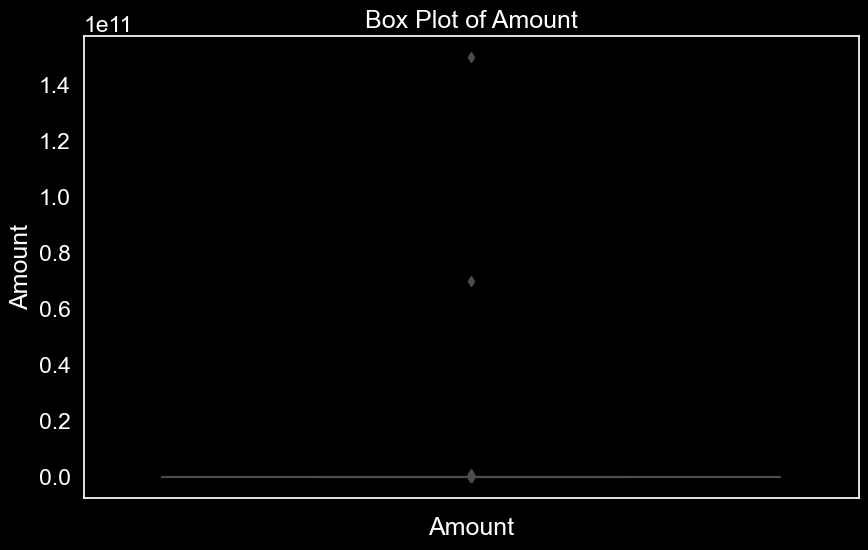

In [94]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(df_combined['Amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(df_combined['Amount'])
amount_kurtosis = kurtosis(df_combined['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_combined['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# # Histogram with KDE Plot
# plt.figure(figsize=(10, 6))
# sns.histplot(df_combined['Amount'], kde=True, color='cyan')
# plt.title('Histogram and KDE of Amount')
# plt.xlabel('Amount')
# plt.ylabel('Frequency')
# plt.show()

In [95]:
# Find the index label of the row with the maximum value in the 'Amount' column
max_amount_index = df_combined['Amount'].idxmax()

# Drop the row using the index label
df_combined = df_combined.drop(max_amount_index).reset_index(drop=True)

# Check DataFrame information
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1974 non-null   object 
 1   Founded        1974 non-null   float64
 2   HeadQuarter    1974 non-null   object 
 3   Sector         1974 non-null   object 
 4   What_it_does   1974 non-null   object 
 5   Founders       1974 non-null   object 
 6   Investor       1974 non-null   object 
 7   Amount         1974 non-null   float64
 8   Stage          1210 non-null   object 
 9   Year           1974 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 146.6+ KB


Descriptive Statistics for 'Amount' column:
count    1.974000e+03
mean     5.801519e+07
std      1.576684e+09
min      1.000000e+04
25%      1.000000e+06
50%      4.000000e+06
75%      1.000000e+07
max      7.000000e+10
Name: Amount, dtype: float64

Skewness for 'Amount' column: 44.255578302261874
Kurtosis for 'Amount' column: 1960.6598088604796


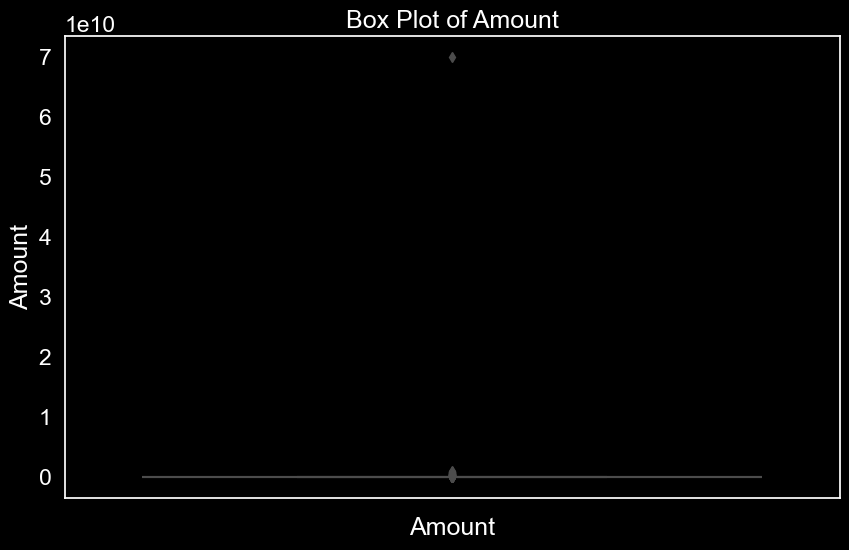

In [96]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(df_combined['Amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(df_combined['Amount'])
amount_kurtosis = kurtosis(df_combined['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_combined['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

In [97]:
# Find the index label of the row with the maximum value in the 'Amount' column
max_amount_index = df_combined['Amount'].idxmax()

# Drop the row using the index label
df_combined = df_combined.drop(max_amount_index).reset_index(drop=True)

# Check DataFrame information
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1973 non-null   object 
 1   Founded        1973 non-null   float64
 2   HeadQuarter    1973 non-null   object 
 3   Sector         1973 non-null   object 
 4   What_it_does   1973 non-null   object 
 5   Founders       1973 non-null   object 
 6   Investor       1973 non-null   object 
 7   Amount         1973 non-null   float64
 8   Stage          1210 non-null   object 
 9   Year           1973 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 146.6+ KB


Descriptive Statistics for 'Amount' column:
count    1.973000e+03
mean     2.256563e+07
std      7.256438e+07
min      1.000000e+04
25%      1.000000e+06
50%      4.000000e+06
75%      1.000000e+07
max      1.000000e+09
Name: Amount, dtype: float64

Skewness for 'Amount' column: 6.976752048922795
Kurtosis for 'Amount' column: 61.453068540301615


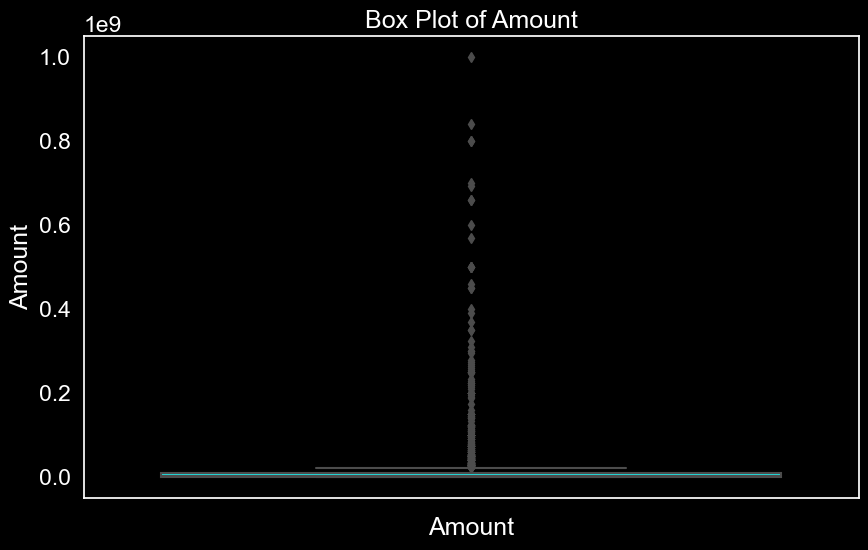

In [98]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(df_combined['Amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(df_combined['Amount'])
amount_kurtosis = kurtosis(df_combined['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_combined['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

In [99]:
# Calculate mean, median, and mode amounts by stage
mean_amounts = df_combined.groupby('Stage')['Amount'].mean()
median_amounts = df_combined.groupby('Stage')['Amount'].median()
mode_amounts = df_combined.groupby('Stage')['Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Display results
print("Mean Amounts by Stage:")
print(mean_amounts)

print("\nMedian Amounts by Stage:")
print(median_amounts)

print("\nMode Amounts by Stage:")
print(mode_amounts)

Mean Amounts by Stage:
Stage
Debt              1.241785e+07
Early Traction    1.117878e+07
Equity            1.000000e+08
Ideation          1.784308e+06
Scaling           6.281388e+07
Validation        2.834096e+06
Name: Amount, dtype: float64

Median Amounts by Stage:
Stage
Debt                6000000.0
Early Traction      5450000.0
Equity            100000000.0
Ideation             550000.0
Scaling            30000000.0
Validation          1600000.0
Name: Amount, dtype: float64

Mode Amounts by Stage:
Stage
Debt               10000000.0
Early Traction      5000000.0
Equity            100000000.0
Ideation            4000000.0
Scaling            30000000.0
Validation          4000000.0
Name: Amount, dtype: float64


In [100]:
# Define a function to fill missing stages based on median amounts
def fill_missing_stage(row):
    if pd.isna(row['Stage']):
        for stage, median in median_amounts.items():
            if row['Amount'] <= median:
                return stage
        return pd.NA  
    return row['Stage']

# Apply the function to fill missing stages
df_combined['Stage'] = df_combined.apply(fill_missing_stage, axis=1)

# Display information
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1973 non-null   object 
 1   Founded        1973 non-null   float64
 2   HeadQuarter    1973 non-null   object 
 3   Sector         1973 non-null   object 
 4   What_it_does   1973 non-null   object 
 5   Founders       1973 non-null   object 
 6   Investor       1973 non-null   object 
 7   Amount         1973 non-null   float64
 8   Stage          1926 non-null   object 
 9   Year           1973 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 146.6+ KB


In [101]:
# Filter the rows where 'Stage' is missing
filter_min_df = df_combined[df_combined['Stage'].isna()]

# Find the minimum 'Amount' value in the filtered DataFrame
filter_min_amount = filter_min_df['Amount'].min()

# Print the minimum 'Amount' value
print('The minimum amount value in the filtered dataframe is:', filter_min_amount)

The minimum amount value in the filtered dataframe is: 110000000.0


In [102]:
def fill_missing_stage_scl(row):
    if pd.isna(row['Stage']):  # Checking if 'Stage' column is NaN
        if pd.notna(row['Amount']):  # Checking if 'Amount' column is not NaN
            return 'Scaling'
    return row['Stage']

# Apply the function to fill missing stages
df_combined['Stage'] = df_combined.apply(fill_missing_stage_scl, axis=1)

# Display information
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1973 non-null   object 
 1   Founded        1973 non-null   float64
 2   HeadQuarter    1973 non-null   object 
 3   Sector         1973 non-null   object 
 4   What_it_does   1973 non-null   object 
 5   Founders       1973 non-null   object 
 6   Investor       1973 non-null   object 
 7   Amount         1973 non-null   float64
 8   Stage          1973 non-null   object 
 9   Year           1973 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 146.6+ KB


In [103]:
df_combined.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.0,Bangalore,Technology and Software,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Validation,2021
1,upGrad,2015.0,Mumbai,Education and Learning,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Scaling,2021
2,Lead School,2012.0,Mumbai,Education and Learning,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Scaling,2021
3,Bizongo,2015.0,Mumbai,E-commerce and Retail,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Scaling,2021
4,FypMoney,2021.0,Gurugram,Finance and Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Validation,2021


In [104]:
# Standardize 'Founded Year' column to integer datatype
df_combined['Founded'] = df_combined['Founded'].astype(int)

# Identify object columns (excluding 'What_it_does' and 'Company_Brand')
object_columns_to_convert21 = [col for col in df_combined.select_dtypes(include=['object']).columns
                             if col not in ['What_it_does', 'Company_Brand']]

# Convert object columns to category datatype
df_combined[object_columns_to_convert21] = df_combined[object_columns_to_convert21].astype('category')

# Display information
df_combined.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  1973 non-null   object  
 1   Founded        1973 non-null   int32   
 2   HeadQuarter    1973 non-null   category
 3   Sector         1973 non-null   category
 4   What_it_does   1973 non-null   object  
 5   Founders       1973 non-null   category
 6   Investor       1973 non-null   category
 7   Amount         1973 non-null   float64 
 8   Stage          1973 non-null   category
 9   Year           1973 non-null   int32   
dtypes: category(5), float64(1), int32(2), object(2)
memory usage: 857.9 KB


# HYPOTHESIS TESTING
Testing the hypothesis using Anova



In [105]:
# Create the model

model = ols('Amount ~ C(Sector) + C(Stage)', data=df_combined).fit()


In [106]:
# Perform the ANOVA

anova_results = sm.stats.anova_lm(model, typ=2)



In [107]:
# Display the results

print(anova_results)


                 sum_sq      df           F         PR(>F)
C(Sector)  8.355346e+16    21.0    1.001256   4.579979e-01
C(Stage)   2.448339e+18     5.0  123.225765  1.586093e-113
Residual   7.732907e+18  1946.0         NaN            NaN


In [108]:
# Interpretation

p_value_sector = anova_results['PR(>F)']['C(Sector)']
p_value_stage = anova_results['PR(>F)']['C(Stage)']


In [109]:
print(f"P-value for Sector: {p_value_sector}")
print(f"P-value for Stage: {p_value_stage}")



P-value for Sector: 0.45799787475975057
P-value for Stage: 1.58609272962711e-113


Accepting or rejecting the hypothesis

In [110]:
if p_value_sector < 0.05:
    print("Reject the null hypothesis for Sector: There is a significant difference in funding across different sectors.")
else:
    print("Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.")



Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.


In [111]:
if p_value_stage < 0.05:
    print("Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.")
else:
    print("Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.")

Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.


# DATA VISUALIZATION & ANALYSIS

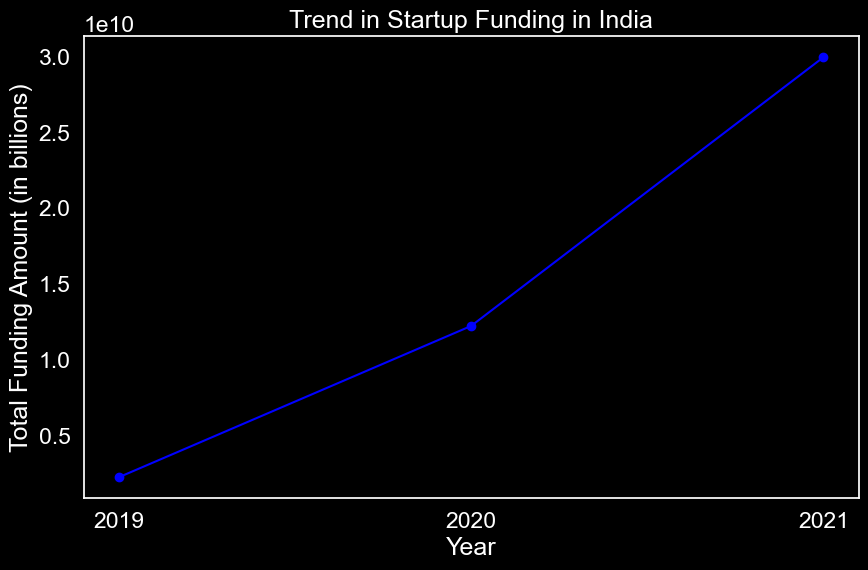

In [112]:
# Plotting a line graph to show the startup funding trends in India across the years (2018-2021)
# Filter the df_combined to include only the desired years

desired_years = [2018, 2019, 2020, 2021]
filtered_df = df_combined[df_combined['Year'].isin(desired_years)]

# Group the filtered data by year and calculate the total funding amount for each year
funding_by_year = filtered_df.groupby('Year')['Amount'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker='o', color='blue')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in billions)')
plt.title('Trend in Startup Funding in India')

# Set the x-axis ticks to only display the desired years
plt.xticks(funding_by_year.index)

# Display the plot
plt.show()

###### Comments

With regards to the funding trends, it started well in the 2019 and increased to its peak in 2021.

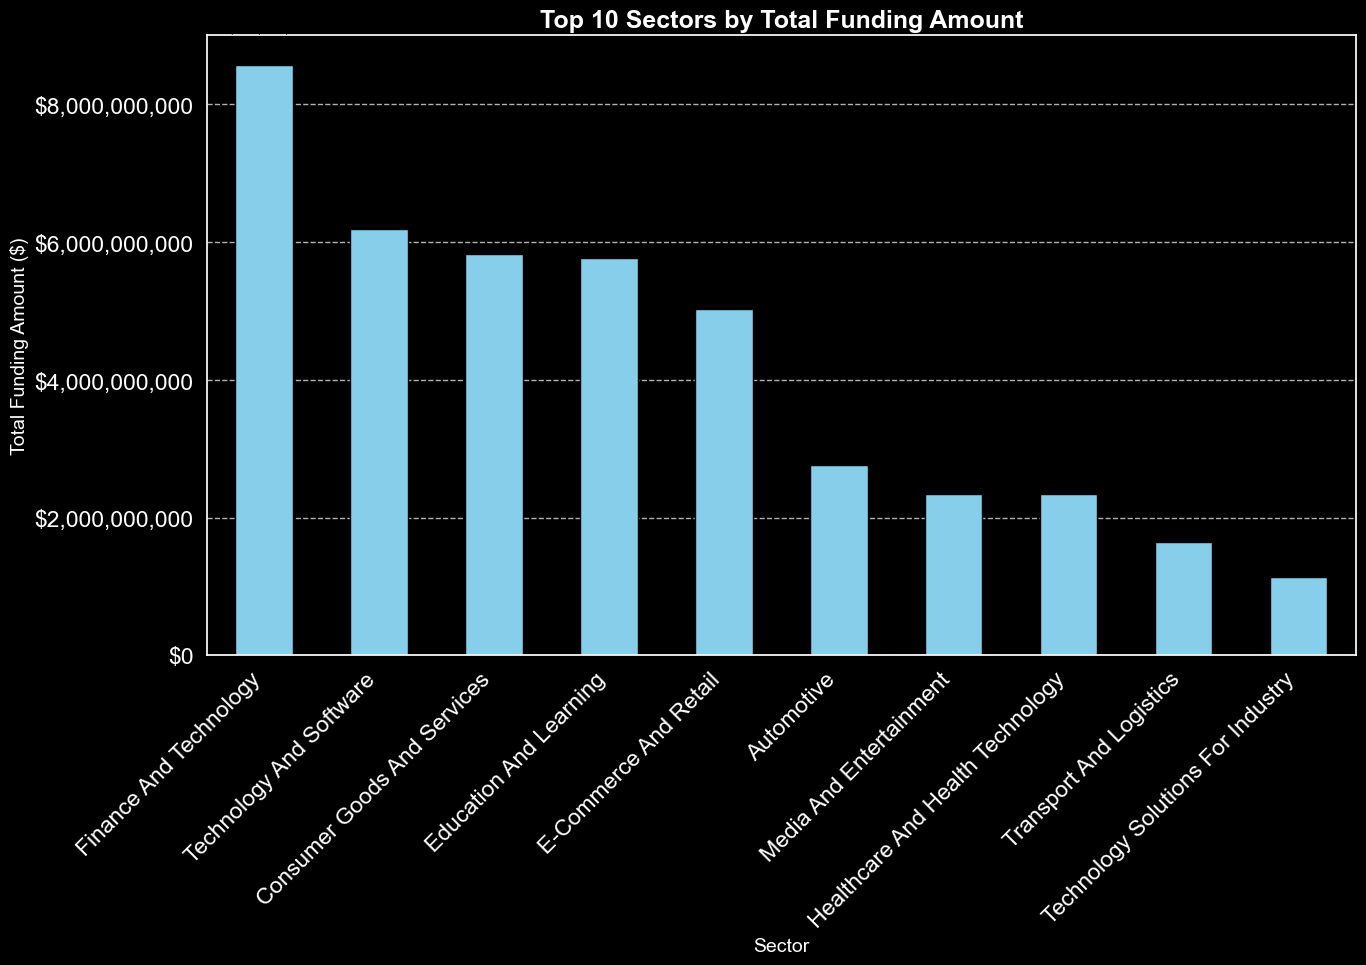

In [113]:
# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')


# Normalize the 'Sector' column
df_combined['Sector'] = df_combined['Sector'].str.strip().str.lower().str.title()
 

# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)


 
# Get the top 10 sectors by funding amount
top_10_sectors = sector_funding.head(10)
 
# Visualization - Bar Chart
plt.figure(figsize=(14, 10))  # Increased figure size for better visibility
bars = top_10_sectors.plot(kind='bar', color='skyblue', edgecolor='black')
 
# Adding data labels to the bars
for index, value in enumerate(top_10_sectors):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')
 

# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
 
# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
 
# Show plot
plt.tight_layout()
plt.show()

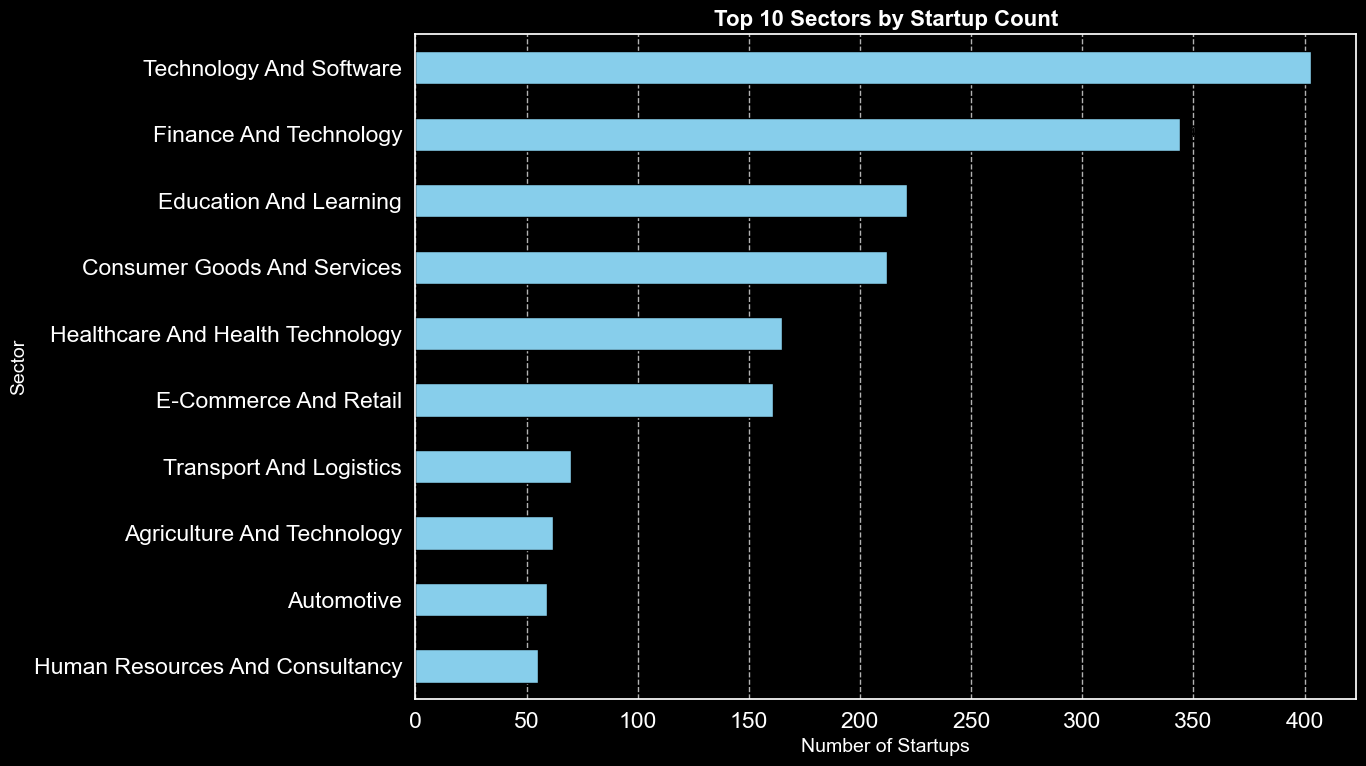

In [114]:
# Group by sector and count the number of startups
sector_startup_count = df_combined['Sector'].value_counts().head(10).sort_values(ascending=True)
 
# Visualization - Horizontal Bar Chart
plt.figure(figsize=(14, 8))
bars = sector_startup_count.plot(kind='barh', color='skyblue', edgecolor='black')
 
# Adding data labels to the bars
for index, value in enumerate(sector_startup_count):
    plt.text(value + 1, index, f'{value}', va='center', ha='left', fontsize=9, color='black')
 

# Titles and labels
plt.title('Top 10 Sectors by Startup Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
 

##### Comment

From this visualization it is very evident that the Technology and Software sector has the largest number of count of start-ups in the their domain followed by Finance and Technology then Education and Learning sector.

In [115]:
# Assuming df_combined is already loaded
# Calculate the total funding amount for each stage
stage_funding = df_combined.groupby('Stage')['Amount'].sum().sort_values(ascending=False)
 
# Create a bar plot for the top 10 stages
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_stages.index, y=top_stages.values, palette='Blues')
 
# Adding data labels to the bars
for index, value in enumerate(top_stages.values):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=6, color='black')
 
# Add a line from highest to lowest
plt.plot(range(len(top_stages)), top_stages.values, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6)
 
# Titles and labels
plt.title('Funding Distribution across Investment Stages', fontsize=16, fontweight='bold')
plt.xlabel('Investment Stage', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
 

NameError: name 'top_stages' is not defined

<Figure size 1000x600 with 0 Axes>

#### Comment 
Turns out that start-ups in Scaling stage receives more funding as compared to other stages.

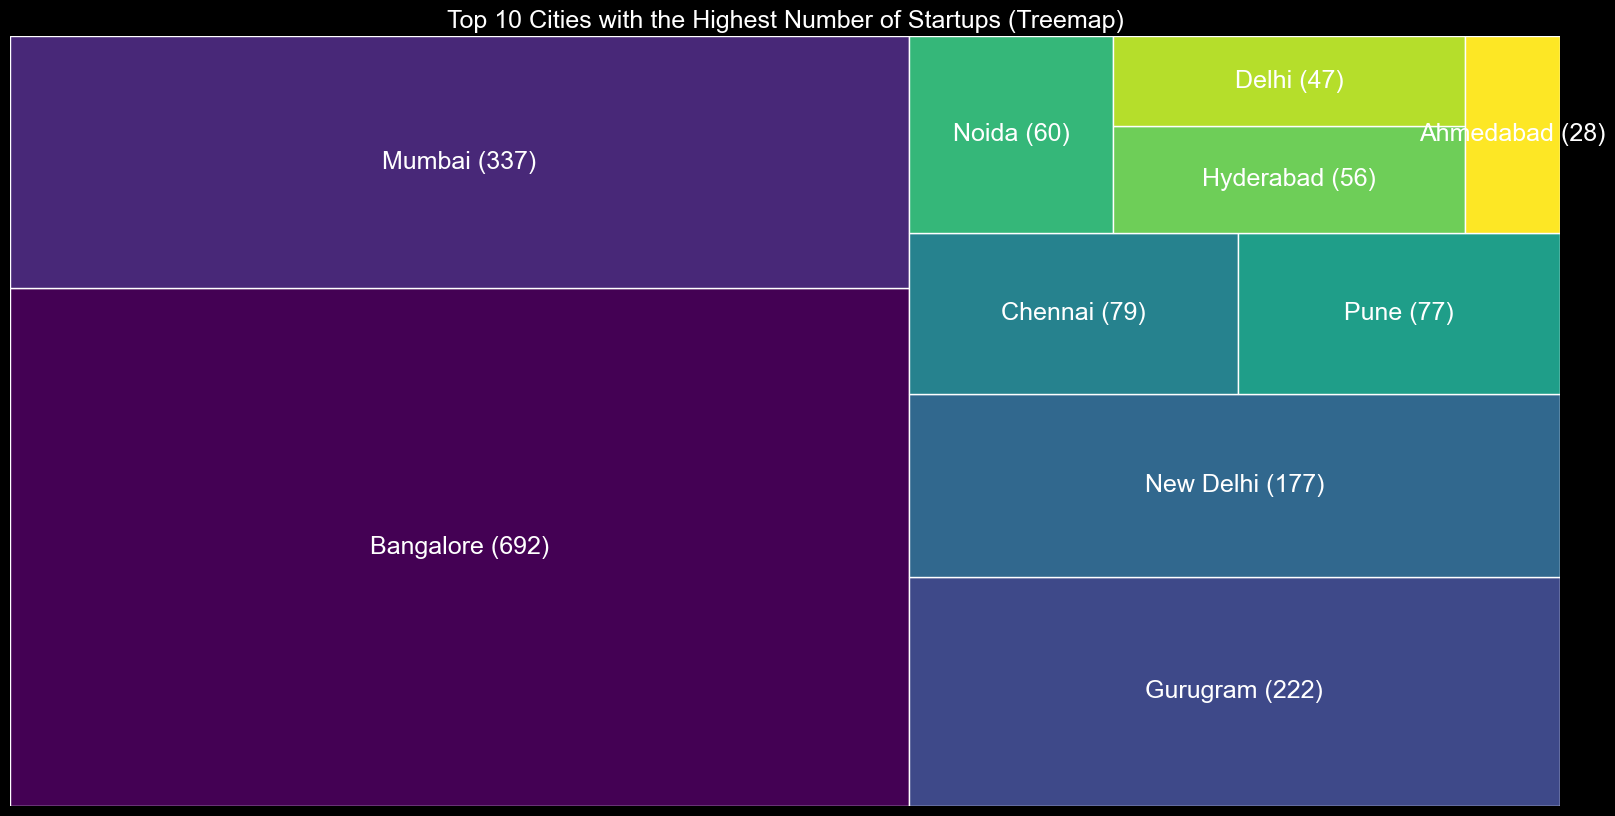

In [133]:
# Do a count of the values for each headquarter in the merged_df
top_10_cities =df_combined['HeadQuarter'].value_counts().head(10)
top_10_cities


# Plotting a treemap showing the top 5 cities with the highest number of startups in the Indian startup ecosystem.
plt.figure(figsize=(20, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_cities)))
squarify.plot(sizes=top_10_cities.values, label=[f'{c} ({v})' for c, v in zip(top_10_cities.index, top_10_cities.values)], color=colors, text_kwargs={'color': 'white'})
plt.axis('off')
plt.title('Top 10 Cities with the Highest Number of Startups (Treemap)')
plt.show()

#Comment.


Bangalore emerged as the city with the highest start-ups companies followed by Mumbai and others. 

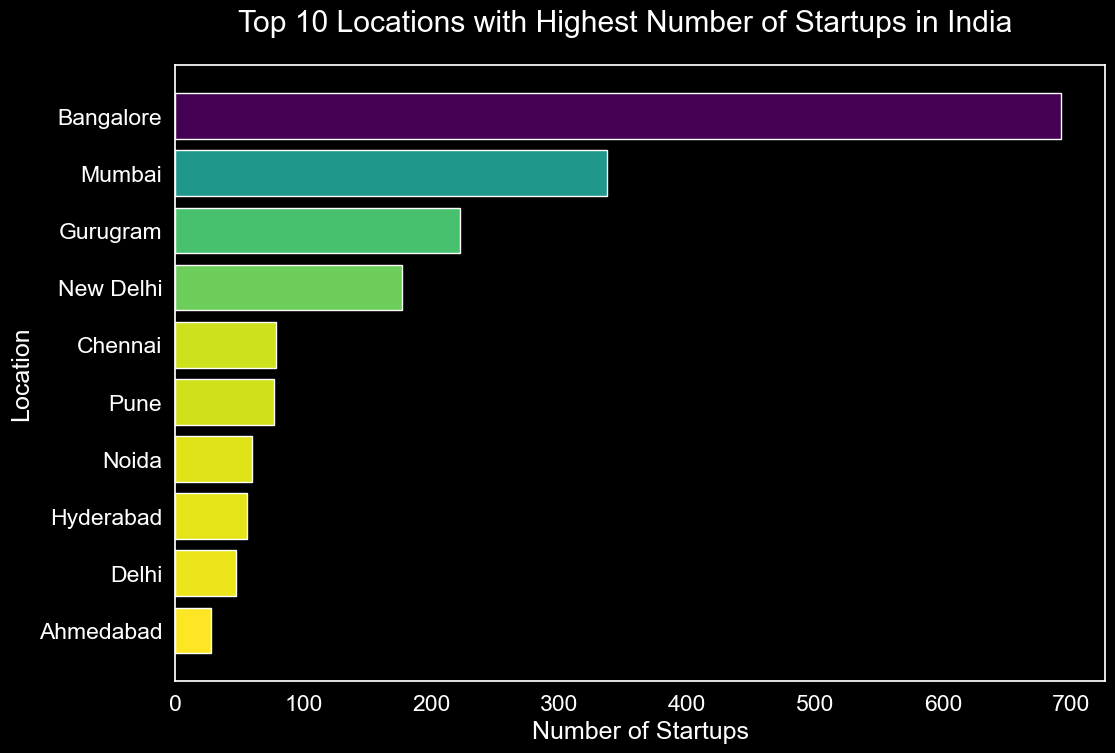

Top 10 Locations with Highest Number of Startups in India:
  HeadQuarter  Startup_Count
0   Bangalore            692
1      Mumbai            337
2    Gurugram            222
3   New Delhi            177
4     Chennai             79
5        Pune             77
6       Noida             60
7   Hyderabad             56
8       Delhi             47
9   Ahmedabad             28


In [136]:


# Count the number of startups in each location
startup_count = df_combined['HeadQuarter'].value_counts().reset_index()
startup_count.columns = ['HeadQuarter', 'Startup_Count']

# Get the top 10 locations with the highest number of startups
top_ten_startup_count = startup_count.head(10).reset_index(drop=True)

# Plotting the results using pyplot with a colormap similar to seaborn's viridis
plt.figure(figsize=(12, 8))
colors = cm.viridis_r((top_ten_startup_count['Startup_Count'] - min(top_ten_startup_count['Startup_Count'])) / (max(top_ten_startup_count['Startup_Count']) - min(top_ten_startup_count['Startup_Count'])))
plt.barh(top_ten_startup_count['HeadQuarter'], top_ten_startup_count['Startup_Count'], color=colors)
plt.xlabel('Number of Startups')
plt.ylabel('Location')
plt.suptitle('Top 10 Locations with Highest Number of Startups in India', y=0.95)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest number of startups at the top



plt.show()

# Display the top 10 locations with the highest number of startups
print("Top 10 Locations with Highest Number of Startups in India:")
print(top_ten_startup_count)

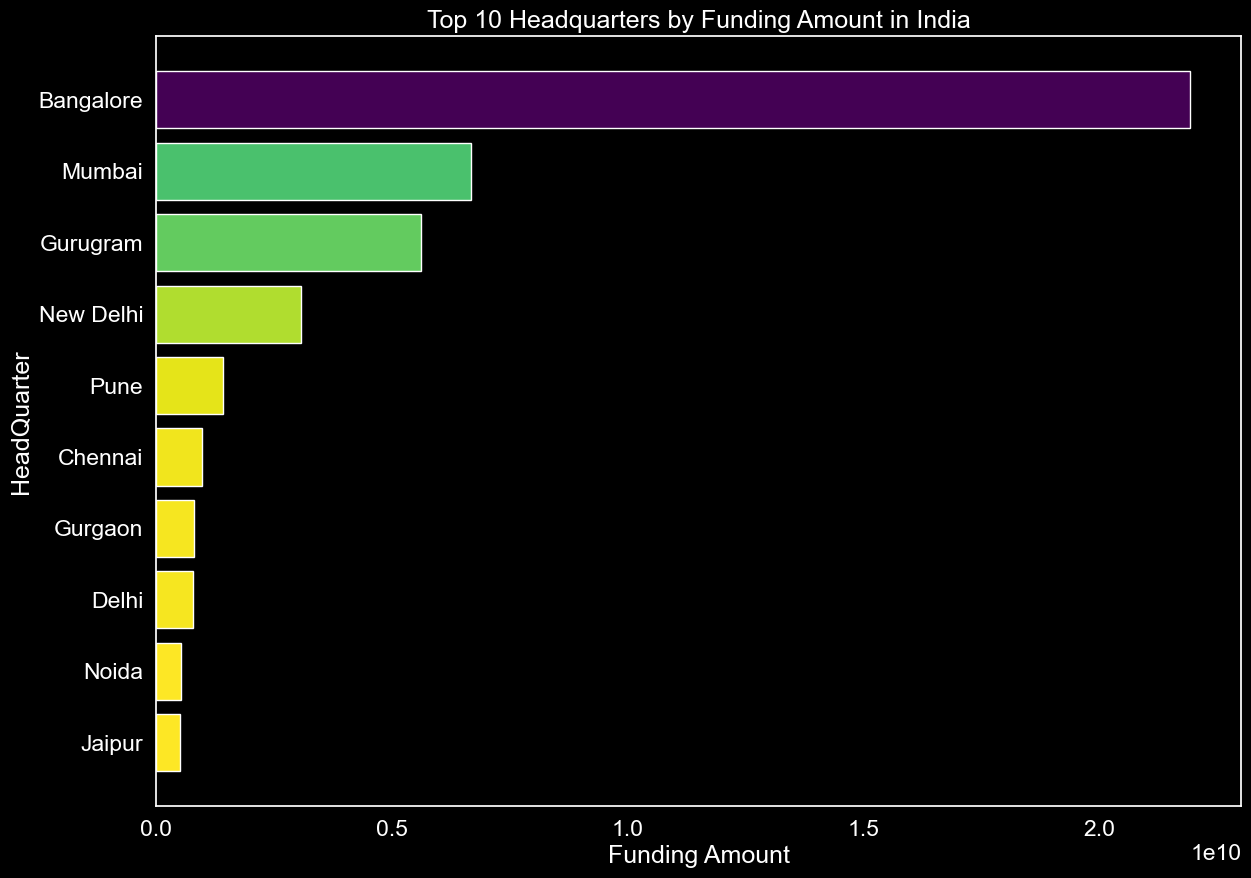

Top 10 Headquarters by Funding Amount in India:
  HeadQuarter        Amount
0   Bangalore  2.191887e+10
1      Mumbai  6.664188e+09
2    Gurugram  5.618098e+09
3   New Delhi  3.069052e+09
4        Pune  1.418444e+09
5     Chennai  9.773781e+08
6     Gurgaon  8.015630e+08
7       Delhi  7.775542e+08
8       Noida  5.325070e+08
9      Jaipur  5.111000e+08


In [137]:


# Group by headquarter location and sum the funding amounts
location_funding = df_combined.groupby('HeadQuarter')['Amount'].sum().sort_values(ascending=False).reset_index()

# Get the top 10 locations with the highest funding amounts
top_ten_location_funding = location_funding.head(10).reset_index(drop=True)

# Plotting the results using pyplot with a colormap similar to seaborn's viridis
plt.figure(figsize=(14, 10))
colors = cm.viridis_r((top_ten_location_funding['Amount'] - min(top_ten_location_funding['Amount'])) / (max(top_ten_location_funding['Amount']) - min(top_ten_location_funding['Amount'])))
plt.barh(top_ten_location_funding['HeadQuarter'], top_ten_location_funding['Amount'], color=colors)
plt.xlabel('Funding Amount')
plt.ylabel('HeadQuarter')
plt.title('Top 10 Headquarters by Funding Amount in India')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest funding amount at the top





plt.show()



# Display the top 10 locations with the highest funding amounts
print("Top 10 Headquarters by Funding Amount in India:")
print(top_ten_location_funding)


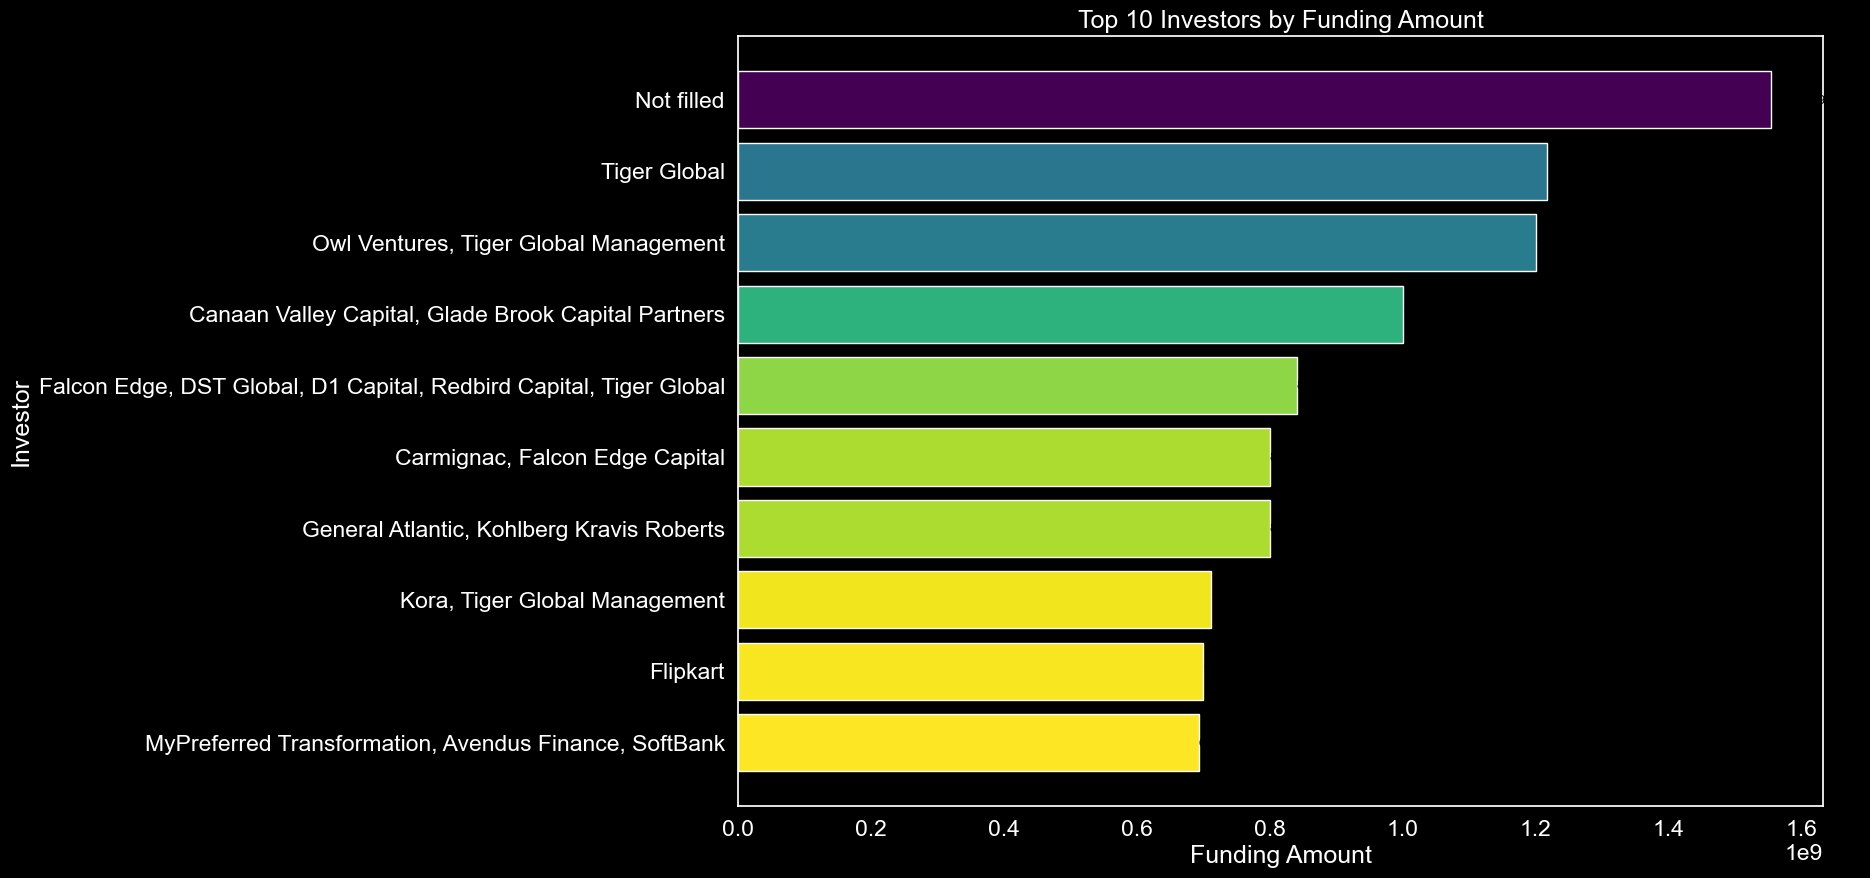

Top 10 Investors by Funding Amount:
                                            Investor        Amount
0                                         Not filled  1.554398e+09
1                                       Tiger Global  1.217000e+09
2              Owl Ventures, Tiger Global Management  1.200000e+09
3  Canaan Valley Capital, Glade Brook Capital Par...  1.000000e+09
4  Falcon Edge, DST Global, D1 Capital, Redbird C...  8.400000e+08
5                     Carmignac, Falcon Edge Capital  8.000000e+08
6          General Atlantic, Kohlberg Kravis Roberts  8.000000e+08
7                      Kora, Tiger Global Management  7.120000e+08
8                                           Flipkart  7.000000e+08
9  MyPreferred Transformation, Avendus Finance, S...  6.930000e+08


In [138]:
# Get the 10 top investors in the start-up ecosystem in india 

# Group by investor and sum the funding amounts
investor_funding = df_combined.groupby('Investor')['Amount'].sum().sort_values(ascending=False).reset_index()

# Get the top 10 investors with the highest funding amounts
top_ten_investor_funding = investor_funding.head(10).reset_index(drop=True)

# Plotting the results using pyplot with a colormap similar to seaborn's viridis
plt.figure(figsize=(14, 10))
colors = cm.viridis_r((top_ten_investor_funding['Amount'] - min(top_ten_investor_funding['Amount'])) / (max(top_ten_investor_funding['Amount']) - min(top_ten_investor_funding['Amount'])))
bars = plt.barh(top_ten_investor_funding['Investor'], top_ten_investor_funding['Amount'], color=colors)
plt.xlabel('Funding Amount')
plt.ylabel('Investor')
plt.title('Top 10 Investors by Funding Amount')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest funding amount at the top

# Annotate the bars with the funding amounts
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10, color='black')

plt.show()

# Display the top 10 investors with the highest funding amounts
print("Top 10 Investors by Funding Amount:")
print(top_ten_investor_funding)


In [126]:
csv_filename='Indian Start-Up Ecosystem-New.csv'
df_combined.to_csv(csv_filename,index= False)

In [127]:
# Key Insights